# Car Evaluation

In [1]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("car.csv", encoding='latin')
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format

dataset.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,4,med,high,unacc
freq,432,432,432,576,576,576,1209


**Car Evaluation Data Set**

Creator:

Marko Bohanec

Donors:

1. Marko Bohanec (marko.bohanec '@' ijs.si)
2. Blaz Zupan (blaz.zupan '@' ijs.si)

# Feature engineering

In [2]:
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
1120,med,med,3,4,med,high,acc
236,vhigh,med,2,more,med,low,unacc
135,vhigh,high,3,2,small,med,unacc
651,high,med,2,2,med,med,unacc
221,vhigh,med,2,2,big,low,unacc


**Values in every column are string type**

In [3]:
dataset['doors'].values

array(['3', '2', '3', ..., '5more', '2', '5more'], dtype=object)

**Create a mapping dictionary to one-hot encoding feature values**

In [4]:
vocabulary_list = {'buying' : ['low', 'med', 'high', 'vhigh'],
                   'maint' : ['low', 'med', 'high', 'vhigh'],
                   'doors' : ['2', '3', '4', '5more'],
                   'persons' : ['2', '4', 'more'],
                   'lug_boot' : ['small', 'med', 'big'],
                   'safety' : ['low', 'med', 'high'],
                   'class' : ['unacc', 'acc', 'good', 'vgood']}

**Create feature layer**

In [5]:
feature_column = []
embedding_dim = 8

buying = tf.feature_column.categorical_column_with_vocabulary_list('buying', vocabulary_list['buying'])
buying = tf.feature_column.embedding_column(buying, embedding_dim)
feature_column.append(buying)

maint = tf.feature_column.categorical_column_with_vocabulary_list('maint', vocabulary_list['maint'])
maint = tf.feature_column.embedding_column(maint, embedding_dim)
feature_column.append(maint)

doors = tf.feature_column.categorical_column_with_vocabulary_list('doors', vocabulary_list['doors'])
doors = tf.feature_column.embedding_column(doors, embedding_dim)
feature_column.append(doors)

persons = tf.feature_column.categorical_column_with_vocabulary_list('persons', vocabulary_list['persons'])
persons = tf.feature_column.embedding_column(persons, embedding_dim)
feature_column.append(persons)

safety = tf.feature_column.categorical_column_with_vocabulary_list('safety', vocabulary_list['safety'])
safety = tf.feature_column.embedding_column(safety, embedding_dim)
feature_column.append(safety)

feature_layer = tf.keras.layers.DenseFeatures(feature_column)

**Split the data set**

In [6]:
train_df = dataset.sample(frac=0.8, random_state=1)
test_df = dataset.drop(train_df.index, axis=0)

**Prepare features and labels**

In [7]:
train_features = {name : np.array(values) for name, values in train_df.items()}
train_labels = np.array(train_features.pop('class'))

test_features = {name : np.array(values) for name, values in test_df.items()}
test_labels = np.array(test_features.pop('class'))

In [8]:
for idx, val in enumerate(vocabulary_list['class']):
    train_labels = np.where(train_labels == val, idx, train_labels)
    test_labels = np.where(test_labels == val, idx, test_labels)
    
train_labels = np.asarray(train_labels).astype(np.float32)
test_labels = np.asarray(test_labels).astype(np.float32)

In [9]:
print(train_features)

{'buying': array(['med', 'high', 'med', ..., 'vhigh', 'low', 'high'], dtype=object), 'maint': array(['low', 'low', 'vhigh', ..., 'low', 'vhigh', 'vhigh'], dtype=object), 'doors': array(['2', '4', '3', ..., '3', '2', '3'], dtype=object), 'persons': array(['2', '2', 'more', ..., '2', '4', '4'], dtype=object), 'lug_boot': array(['med', 'med', 'small', ..., 'med', 'med', 'small'], dtype=object), 'safety': array(['high', 'high', 'low', ..., 'high', 'med', 'high'], dtype=object)}


In [10]:
print(feature_layer(dict(train_features)))

tf.Tensor(
[[ 0.5547482  -0.23339444  0.13346213 ...  0.4058157   0.3992212
  -0.05549274]
 [-0.1984569  -0.1568038  -0.15186796 ...  0.4058157   0.3992212
  -0.05549274]
 [ 0.5547482  -0.23339444  0.13346213 ... -0.41066313  0.4957767
  -0.28843015]
 ...
 [ 0.26184592 -0.1271563   0.67016745 ...  0.4058157   0.3992212
  -0.05549274]
 [ 0.02795715  0.24306343 -0.24024093 ... -0.03209613 -0.14599727
   0.15243301]
 [-0.1984569  -0.1568038  -0.15186796 ...  0.4058157   0.3992212
  -0.05549274]], shape=(1382, 40), dtype=float32)


# Build a model

**Create and train a model**

Epoch 1/20
78/78 - 2s - loss: 0.9294 - accuracy: 0.6798 - val_loss: 0.7220 - val_accuracy: 0.6403 - 2s/epoch - 23ms/step
Epoch 2/20
78/78 - 0s - loss: 0.5313 - accuracy: 0.7691 - val_loss: 0.4775 - val_accuracy: 0.8633 - 200ms/epoch - 3ms/step
Epoch 3/20
78/78 - 0s - loss: 0.4043 - accuracy: 0.8455 - val_loss: 0.3987 - val_accuracy: 0.8849 - 178ms/epoch - 2ms/step
Epoch 4/20
78/78 - 0s - loss: 0.3543 - accuracy: 0.8504 - val_loss: 0.3612 - val_accuracy: 0.8849 - 177ms/epoch - 2ms/step
Epoch 5/20
78/78 - 0s - loss: 0.3228 - accuracy: 0.8560 - val_loss: 0.3349 - val_accuracy: 0.8993 - 177ms/epoch - 2ms/step
Epoch 6/20
78/78 - 0s - loss: 0.3009 - accuracy: 0.8632 - val_loss: 0.3113 - val_accuracy: 0.9137 - 179ms/epoch - 2ms/step
Epoch 7/20
78/78 - 0s - loss: 0.2803 - accuracy: 0.8721 - val_loss: 0.3014 - val_accuracy: 0.9065 - 182ms/epoch - 2ms/step
Epoch 8/20
78/78 - 0s - loss: 0.2590 - accuracy: 0.8866 - val_loss: 0.3090 - val_accuracy: 0.8705 - 180ms/epoch - 2ms/step
Epoch 9/20
78/78 -

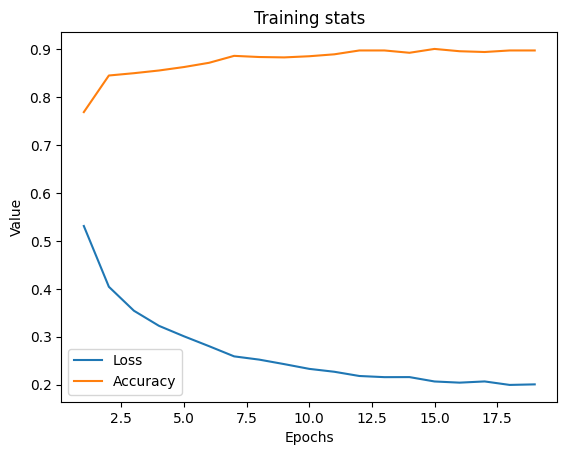

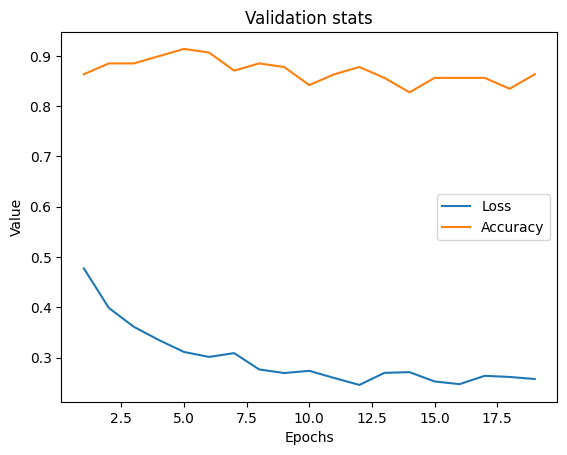

In [11]:
model = None

used_features = 4
learning_rate = 0.001
epochs = 20
batch_size = 16

# regularization = tf.keras.regularizers.l1(l1=0.001)

# Create a model
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(units=used_features * embedding_dim, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
history = model.fit(x=train_features, y=train_labels, batch_size=batch_size, epochs=epochs,
                    shuffle=True, validation_split=0.1, verbose=2)

epochs, history = history.epoch, pd.DataFrame(history.history)

train_history = history.values[:, :2]
validation_history = history.values[:, 2:]

# Plot training stats
plt.plot(epochs[1:], train_history[1:])
plt.title('Training stats')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy', 'Precision', 'Recall'])
plt.show()

# Plot validation stats
plt.plot(epochs[1:], validation_history[1:])
plt.title('Validation stats')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy', 'Precision', 'Recall'])
plt.show()

# Test the model

In [12]:
model.evaluate(x=test_features, y=test_labels, batch_size=batch_size)

22/22 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9014


[0.1936468631029129, 0.9014492630958557]

In [13]:
predictions = model.predict(x=test_features, batch_size=batch_size)

22/22 [==============================] - 0s 2ms/step


In [14]:
idx = 234
print(vocabulary_list['class'][int(test_labels[idx])])
print(vocabulary_list['class'][np.argmax(predictions[idx])])

acc
acc
